In [16]:
from langgraph.graph import StateGraph ,START ,END
from typing import TypedDict,Literal



In [17]:
class QuadState (TypedDict):
    a:int
    b:int
    c:int

    equation:str
    discriminant:float
    result:str

In [18]:
graph=StateGraph(QuadState)

In [19]:
def show_equation(state: QuadState) :
 equation=f'{state["a"]}x^2 + {state["b"]}x + {state["c"]}'
 return {'equation':equation}

def compute_discriminant(state: QuadState) :

    discriminant=state['b']**2 - (4*state['a']*state['c'])
    return {'discriminant':discriminant}

def real_roots(state: QuadState):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}

def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

In [20]:
graph.add_node('show_equation',show_equation)
graph.add_node('compute_discriminant',compute_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','compute_discriminant')
graph.add_conditional_edges('compute_discriminant',check_condition)


graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

workflow=graph.compile()

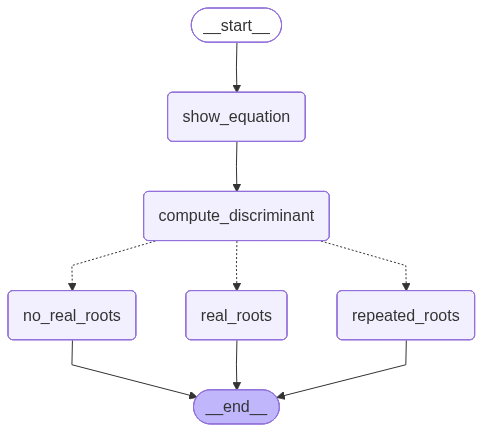

In [21]:
workflow

In [24]:
initial_state={
    'a':4,
    'b':2,
    'c':4
}

In [25]:
workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 4,
 'equation': '4x^2 + 2x + 4',
 'discriminant': -60,
 'result': 'No real roots'}